In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider
import scipy

# GX 01
You are given the complex field `01_unknown.npy`. Load the complex array with `np.load("01_unknown.npy")`.
The wavelength is 633nm and the physical pixel size of the image is 1µm.


## Tasks
### 1
What is the right negative propagation distance to obtain a sharp meaningful image?


### 2 Bonus
What happens if you scale the pixel size and the propagation distance by a factor of 10. Does it still work? Try it out and explain what happens.
What would you need to change to make it work again.

In [14]:
def angular_spectrum_propagation(U0, wvl, d, dx):
    """
    Propagates an optical field using the Angular Spectrum Method.

    Parameters:
        U0  : 2D numpy array (input wavefield)
        wvl : float (wavelength of light in meters)
        d   : float (propagation distance in meters)
        dx  : float (sampling interval in meters)

    Returns:
        U   : 2D numpy array (propagated wavefield)
    """

    # Get array size
    ny, nx = U0.shape
    k = 2 * np.pi / wvl  # Wave number

    # Create spatial frequency coordinates
    fx = np.fft.fftfreq(nx, dx)
    fy = np.fft.fftfreq(ny, dx)
    FX, FY = np.meshgrid(fx, fy)

    # Compute transfer function
    H = np.exp(1j * k * d * np.sqrt(1 - (wvl * FX) ** 2 - (wvl * FY) ** 2))
    H[np.isnan(H)] = 0  # Remove undefined values

    # Compute angular spectrum
    U0_spectrum = np.fft.fft2((U0))
    U_spectrum = U0_spectrum * H

    # Inverse FFT to obtain propagated field
    U = np.fft.ifft2(U_spectrum)

    return U


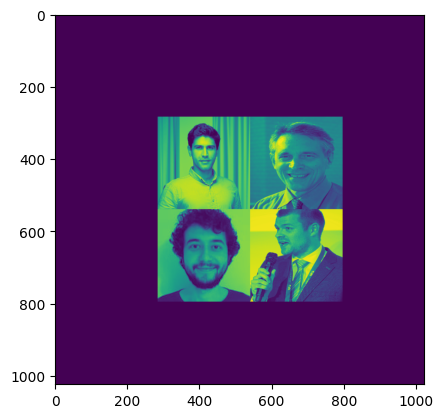

In [33]:
plt.imshow(np.abs(angular_spectrum_propagation(np.load("01_unknown.npy"), 633e-9, -30e-3, 1e-6))**2)

In [22]:
def angular_spectrum_propagation_range(U0, wvl, d_range, dx):
    """
    Propagates an optical field using the Angular Spectrum Method over a range of distances.

    Parameters:
        U0      : 2D numpy array (input wavefield)
        wvl     : float (wavelength of light in meters)
        d_range : list or numpy array (range of propagation distances in meters)
        dx      : float (sampling interval in meters)

    Returns:
        U_list  : list of 2D numpy arrays (propagated wavefields for each distance in d_range)
    """
    
    # Get array size
    ny, nx = U0.shape
    k = 2 * np.pi / wvl  # Wave number

    # Create spatial frequency coordinates
    fx = np.fft.fftfreq(nx, dx)
    fy = np.fft.fftfreq(ny, dx)
    FX, FY = np.meshgrid(fx, fy)
    
    # Initialize list to store results
    U_list = []
    
    # Compute angular spectrum of input field
    U0_spectrum = np.fft.fft2(U0)
    
    for d in d_range:
        # Compute transfer function for given distance d
        H = np.exp(1j * k * d * np.sqrt(1 - (wvl * FX) ** 2 - (wvl * FY) ** 2))
        H[np.isnan(H)] = 0  # Remove undefined values
        
        # Apply transfer function
        U_spectrum = U0_spectrum * H
        
        # Inverse FFT to obtain propagated field
        U = np.fft.ifft2(U_spectrum)
        U_list.append(U)
    
    return U_list


With a x-z plot you see the point where it gets sharp

In [59]:
grating_zs[1].shape

(1024, 1024)

In [56]:
grating_zs = angular_spectrum_propagation_range(np.load("01_unknown.npy"), 633e-9, -np.linspace(0, 50e-3, 50), 1e-6)

array_3d = np.stack(grating_zs, axis=0)

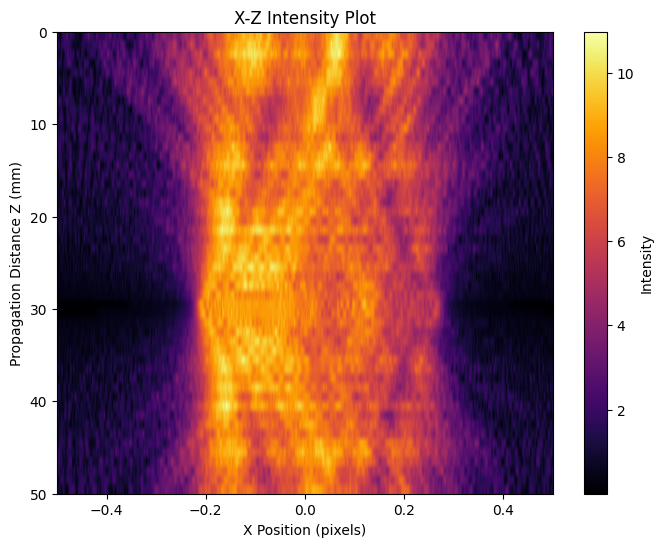

In [71]:
# Plot the x-z intensity profile
plt.figure(figsize=(8, 6))
plt.imshow(np.abs(array_3d[:, 500, :])**0.8, extent=[-0.5,0.5, 50, 0], 
           aspect='auto', cmap='inferno')
plt.colorbar(label="Intensity")
plt.xlabel("X Position (pixels)")
plt.ylabel("Propagation Distance Z (mm)")
plt.title("X-Z Intensity Plot")
plt.show()

# 2 Bonus

In wave optics, everything scales relative with the wavelength.
If we scale everything by 10, the wavelength is still the same and the physics will be different.
So we have to scale the wavelength too.

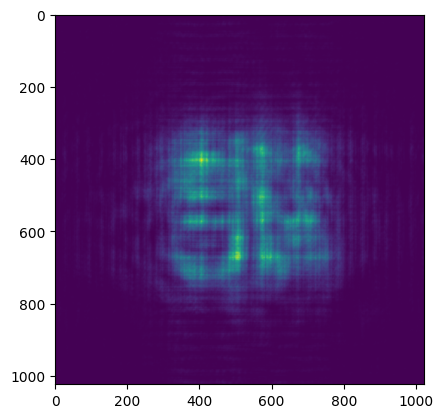

In [6]:
plt.imshow(np.abs(angular_spectrum_propagation(np.load("01_unknown.npy"), 633e-9, 10 * -30e-3, 10 * 1e-6))**2)

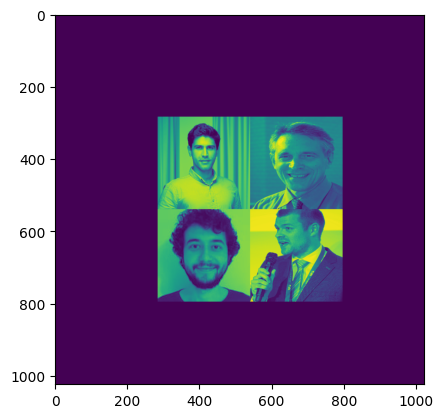

In [7]:
plt.imshow(np.abs(angular_spectrum_propagation(np.load("01_unknown.npy"), 10 * 633e-9, 10 * -30e-3, 10 * 1e-6))**2)